In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats.weightstats import DescrStatsW

## NOTE
Since the visualizations require extensive code, I’ve organized the plotting functions in a separate Python file—**south_sudan_visuals_function2.py**. This approach keeps the main analysis clean and easy to follow, allowing the reader to focus on insights rather than code details.

In [2]:
df = pd.read_csv('/content/UNHCR_SSD_2023_FDS_data_roster.csv')
df.head()

<ipython-input-2-7b72c0b068fe>:1: DtypeWarning: Columns (15,17,42,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/UNHCR_SSD_2023_FDS_data_roster.csv')


,Intro_07_1,start,end,admin0,admin1,admin2,admin3,Final_01,ID,rosterposition,...,HH_Educ18,HH_Educ23,Dis_03,Dis_06,Dis_09,Dis_12,Dis_15,Dis_18,wgh_samp_resc_pop,wgh_samp_resc_str
0,Refugees,2023-04-29,2023-04-29,SSD,Central Equatoria,Juba,Not applicable,Complete Interview,1,1,...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,0.621428,0.909197
1,Refugees,2023-04-29,2023-04-29,SSD,Central Equatoria,Juba,Not applicable,Complete Interview,1,2,...,Elementary second cycle - grade 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621428,0.909197
2,Refugees,2023-04-29,2023-04-29,SSD,Central Equatoria,Juba,Not applicable,Complete Interview,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621428,0.909197
3,Refugees,2023-04-29,2023-04-29,SSD,Central Equatoria,Juba,Not applicable,Complete Interview,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621428,0.909197
4,Refugees,2023-04-29,2023-04-29,SSD,Central Equatoria,Juba,Not applicable,Complete Interview,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621428,0.909197


In [3]:
#Check if there are rows with null values at weights column or zero

df[df['wgh_samp_resc_str'].isna() | (df['wgh_samp_resc_str'] == 0)]

,Intro_07_1,start,end,admin0,admin1,admin2,admin3,Final_01,ID,rosterposition,...,HH_Educ18,HH_Educ23,Dis_03,Dis_06,Dis_09,Dis_12,Dis_15,Dis_18,wgh_samp_resc_pop,wgh_samp_resc_str


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Columns: 144 entries, Intro_07_1 to wgh_samp_resc_str
dtypes: float64(74), int64(2), object(68)
memory usage: 24.3+ MB


In [5]:
df['ageYears'].unique()

array(['30', '43', '18', '15', '11', '09', '03', '01', '12', '10', '02',
       nan, '59', '50', '21', '16', '13', '08', '05', '00', '33', '45',
       '14', '07', '60 or more', '42', '38', '06', '20', '36', '24', '35',
       '28', '26', '53', '44', '48', '27', '04', '22', '19', '17', '34',
       '39', '25', '55', '23', '46', '32', '29', '41', '40', '31', '56',
       '51', '52', '49', '37', '47', '57', '54', '58'], dtype=object)

In [6]:
# I will filter out the columns to remain with ones having the desired information
desired_columns =[
    "Intro_07_1",
    "admin0",
    "admin1",
    "ID",
    "rosterposition",
    "HH_03",
    "HH_02",
    "ageYears",
    "HH_00",
    "HH_00a_year",
    "HH_00a_month",
    "HH_00b_year",
    "HH_00b_month",
    "HH_11a",
    "HH_11b",
    "HH_13",
    "ID_00",
    "ID_01a",
    "ID_01b",
    "ID_02",
    "ID_03",
    "ID_04",
    "ID_05",
    "ID_06",
    "ID_06b",
    "ID_07",
    "ID_08",
    "ID_09",
    "ID_10",
    "ID_11",
    "ID_VAR",
    "HH_06",
    "HH_06_specify",
    "HH_07a",
    "HH_07b",
    "HH_08",
    "HH_09",
    "HH_16",
    "HH_18",
    "HH_19",
    "HH_21",
    "HH_22",
    "HH_23",
    "HH_25",
    "HH_26",
    "HH_27",
    "HH_28",
    "HH_29",
    "HH_Educ00",
    "HH_Educ01",
    "HH_Educ02a",
    "HH_Educ02b",
    "HH_Educ02c",
    "HH_Educ03",
    "HH_Educ04a",
    "HH_Educ04b",
    "HH_Educ05",
    "HH_Educ06",
    "HH_Educ07",
    "HH_Educ10",
    "HH_Educ15a",
    "HH_Educ15b",
    "HH_Educ16",
    "HH_Educ17",
    "HH_Educ18",
    "HH_Educ23",
    "Dis_03",
    "Dis_06",
    "Dis_09",
    "Dis_12",
    "Dis_15",
    "Dis_18",
    "wgh_samp_resc_pop",
    "wgh_samp_resc_str"
]


In [7]:
#cleaning age column converting age column to integer and doing away with null rows in this column
#first,deal with the 60 or more rows
df = df.drop(df[df['ageYears'] == '60 or more'].index)
df = df.dropna(subset=['ageYears'])
df['ageYears'] = df['ageYears'].astype(int)

In [8]:
# I will filter upto the age 17years since thats the standard child age range according to UNICEF
# https://www.unicef.org/child-rights-convention/convention-text-childrens-version#:~:text=A%20child%20is%20any%20person%20under%20the%20age%20of%2018.
#"A child is any person under the age of 18."

df = df[desired_columns]
df = df[df['ageYears'] < 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12479 entries, 3 to 22091
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Intro_07_1         12479 non-null  object 
 1   admin0             12479 non-null  object 
 2   admin1             11962 non-null  object 
 3   ID                 12479 non-null  int64  
 4   rosterposition     12479 non-null  int64  
 5   HH_03              12463 non-null  object 
 6   HH_02              12474 non-null  object 
 7   ageYears           12479 non-null  int64  
 8   HH_00              12478 non-null  object 
 9   HH_00a_year        521 non-null    object 
 10  HH_00a_month       525 non-null    float64
 11  HH_00b_year        1 non-null      object 
 12  HH_00b_month       0 non-null      float64
 13  HH_11a             8046 non-null   float64
 14  HH_11b             32 non-null     object 
 15  HH_13              12401 non-null  object 
 16  ID_00              1775 non

In [9]:
#I have also checked for inconsistencies in this questions
# such as male reporting giving birth and found the data to be clean
df[(df['HH_02'] == 'Male') & (df['HH_27'] == 'yes')]

,Intro_07_1,admin0,admin1,ID,rosterposition,HH_03,HH_02,ageYears,HH_00,HH_00a_year,...,HH_Educ18,HH_Educ23,Dis_03,Dis_06,Dis_09,Dis_12,Dis_15,Dis_18,wgh_samp_resc_pop,wgh_samp_resc_str


In [10]:
#This actually nice for the analysis, about half of the respondents are children
len(df)

12479

In [11]:
# First we'll get a look at children who have given birth in the past two years.
# As this is question is specific to females I will create a dataset that has only female children
#respondents
df_f_children = df[df['HH_02'] == 'Female']

In [12]:
df_f_children['HH_27'].unique()
pregnancy_answer = ['yes', 'no',"don't know", 'refuse to answer']

In [13]:
# function that will help in getting stats and insights that
# represent the whole population(either refugee or host community)
def weighted_category_proportions2(df, var, weight,var_values,merge_dict = None):

  """df -- dataframe that has the column we are viewing
   var -- column we want to get the weighted rate
   weight -- column with the weight values
   var_values -- unique values in the var coumn we would like to get there rates"""

  df = df[df[var].isin(var_values)].copy()
  if merge_dict:
    df[var] = df[var].replace(merge_dict)
    var_values = list(merge_dict.values())

  def helper(df, var, weight,var_values):

    dummies = pd.get_dummies(df[var])

    # Ensure all expected columns exist, even if not in data
    for v in set(var_values):
        if v not in dummies.columns:
            dummies[v] = 0
    # Remove columns that are all zeros
    dummies = dummies.loc[:, (dummies != 0).any(axis=0)]

    dsw = DescrStatsW(dummies, weights=df[weight], ddof=0)

    means = pd.Series(dsw.mean, index=dummies.columns)

    result = {}
    for i, category in enumerate(dummies.columns):
        pct = means.get(category, 0) * 100
        result[f"{category.title()} -----> (%)"] = f"{pct:.1f}%"
    return result

      # Only valid answers

  groups = ['Host community North', 'Refugees']
  results = {}
  for group in groups:
    subset = df[df['Intro_07_1'] == group]
    stats = helper(df = subset, var = var,weight = weight,var_values = var_values)
    results[group] = stats

  return results


In [14]:
#Checking pregnancy rate among children in both communities
pregnancy_rate_among_children = weighted_category_proportions2(df = df_f_children,
                                                                var = 'HH_27',
                                                                weight = 'wgh_samp_resc_str',
                                                                var_values = pregnancy_answer)

In [15]:
pregnancy_rate_among_children

{'Host community North': {"Don'T Know -----> (%)": '0.4%',
  'No -----> (%)': '96.6%',
  'Yes -----> (%)': '3.0%'},
 'Refugees': {"Don'T Know -----> (%)": '0.1%',
  'No -----> (%)': '94.6%',
  'Refuse To Answer -----> (%)': '0.2%',
  'Yes -----> (%)': '5.2%'}}

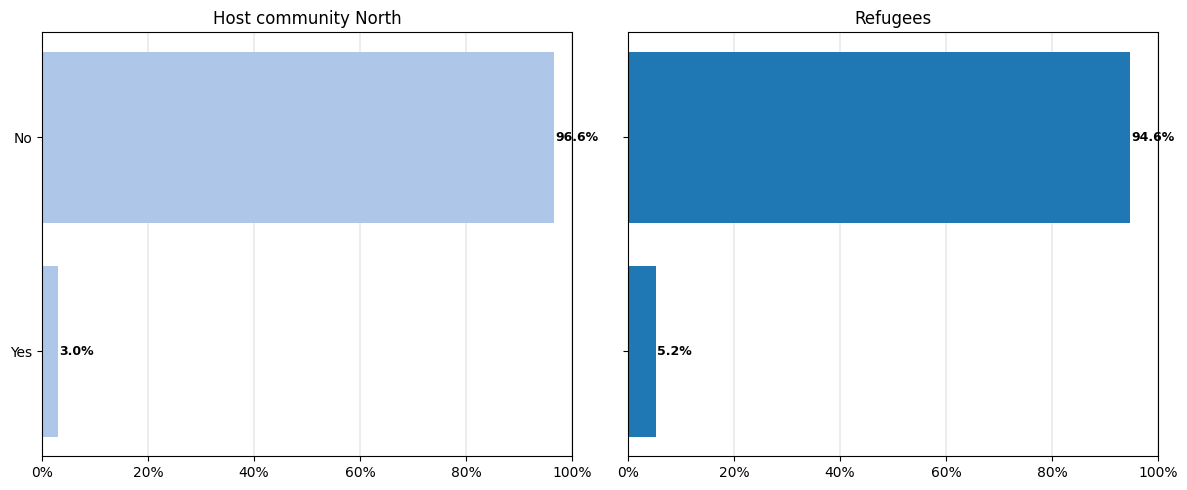

In [16]:
from south_sudan_visuals_function2 import plot_pregnancy_rate_among_children
plot_pregnancy_rate_among_children(pregnancy_rate_among_children)

### Pregnancy Among Girls Aged 17 Years and Below

Pregnancy cases were reported among girls aged 17 years and younger in both the host community and refugee populations. In the host community, 3.0% of girls were pregnant, while 5.2% of refugee girls were reported to be pregnant. Despite most girls not being pregnant, these findings confirm the presence of pregnancy among children in both groups.

In [17]:
# Now onto the next checking marital status of children respondents
# This can be from both genders but also due to the marriage nature in
# african countries we'll check the individual rates of each gender too

#Creating the Male dataset
df_m_children = df[df['HH_02'] == 'Male']

In [18]:
#Checking to also ensure there is no form of union for children below the age of 10
df[(df['ageYears'] < 10) & df['HH_08'].isin(['monogamous/married',
    'polygamous/married','non-formal union','divorced','separated','non-formal union','never married'])]

,Intro_07_1,admin0,admin1,ID,rosterposition,HH_03,HH_02,ageYears,HH_00,HH_00a_year,...,HH_Educ18,HH_Educ23,Dis_03,Dis_06,Dis_09,Dis_12,Dis_15,Dis_18,wgh_samp_resc_pop,wgh_samp_resc_str


In [19]:
print(df_m_children['HH_08'].unique())
print(df_f_children['HH_08'].unique())
print(df['HH_08'].unique())

['never married' nan 'monogamous/married']
['never married' nan 'monogamous/married' 'widow or widower' 'divorced'
 'separated' 'polygamous/married' 'non-formal union']
['never married' nan 'monogamous/married' 'widow or widower' 'divorced'
 'separated' 'polygamous/married' 'non-formal union']


In [20]:
marital_status_answers = ['monogamous/married','never married','polygamous/married'
 'widow or widower','non-formal union','divorced','separated']
marital_status_mapping = {
    'monogamous/married': 'Married',
    'polygamous/married': 'Married',
    'non-formal union': 'Union/Informal',
    'never married': 'Never Married',
    'divorced': 'Previously Married',
    'separated': 'Previously Married',
    'widow or widower': 'Previously Married',
}


In [21]:
# marriage rate for all children
children_marriage_rate = weighted_category_proportions2(df = df,
                                                       var = 'HH_08',
                                                       weight = 'wgh_samp_resc_str',
                                                       var_values = marital_status_answers,
                                                        merge_dict = marital_status_mapping)

In [22]:
children_marriage_rate

{'Host community North': {'Married -----> (%)': '3.5%',
  'Never Married -----> (%)': '96.5%',
  'Union/Informal -----> (%)': '0.1%'},
 'Refugees': {'Married -----> (%)': '2.0%',
  'Never Married -----> (%)': '97.9%',
  'Previously Married -----> (%)': '0.1%',
  'Union/Informal -----> (%)': '0.0%'}}

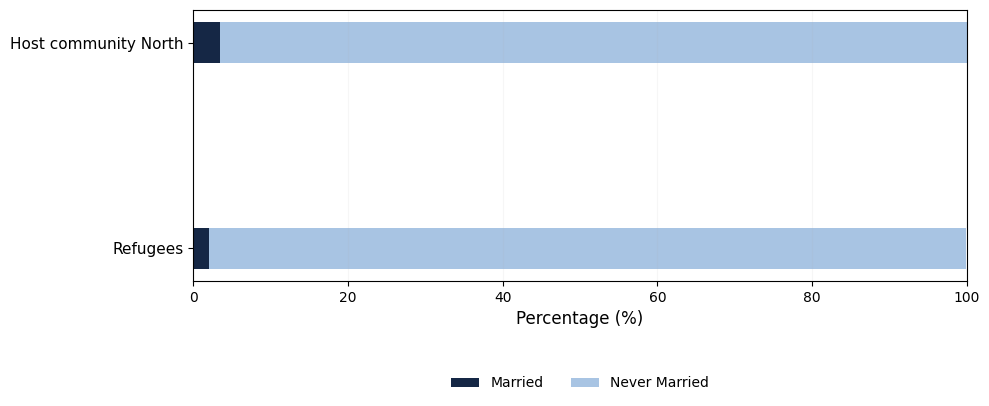

In [23]:
from south_sudan_visuals_function2 import plot_children_marriage_rate
plot_children_marriage_rate(children_marriage_rate)

### Marriage Among Children Aged 17 Years and Below

Marriage among children aged 17 years and younger was observed in both the host community and refugee populations. In the host community, 3.5% of children were reported as married, compared to 2.0% among refugees. Very few children reported being in a union or having been previously married, and the large majority of children in both groups had never been married.

In [24]:
# marriage rate for female children
f_children_marriage_rate = weighted_category_proportions2(df = df_f_children,
                                                          var = 'HH_08',
                                                          weight = 'wgh_samp_resc_str',
                                                          var_values = marital_status_answers,
                                                          merge_dict = marital_status_mapping)

In [25]:
f_children_marriage_rate

{'Host community North': {'Married -----> (%)': '5.7%',
  'Never Married -----> (%)': '94.1%',
  'Union/Informal -----> (%)': '0.2%'},
 'Refugees': {'Married -----> (%)': '3.2%',
  'Never Married -----> (%)': '96.6%',
  'Previously Married -----> (%)': '0.2%',
  'Union/Informal -----> (%)': '0.0%'}}

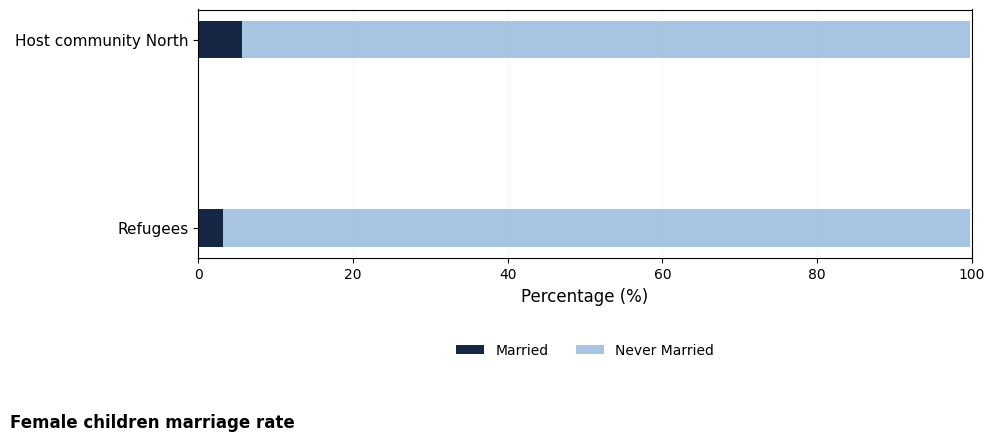

In [26]:
from south_sudan_visuals_function2 import plot_female_children_marriage_rate
plot_female_children_marriage_rate(f_children_marriage_rate)

In [27]:
# marriage rate for male children
# Here there is a missing category of widower or widow as no male child reported that case
# we'll edit our asnsweer list and dictionary to remove that option
marital_status_answers2 = ['monogamous/married','never married','polygamous/married',
                           'non-formal union','divorced','separated']
marital_status_mapping2 = {
    'monogamous/married': 'Married',
    'polygamous/married': 'Married',
    'non-formal union': 'Union/Informal',
    'never married': 'Never Married',
    'divorced': 'Previously Married',
    'separated': 'Previously Married',
}


In [28]:
m_children_marriage_rate = weighted_category_proportions2(df = df_m_children,
                                                          var = 'HH_08',
                                                          weight = 'wgh_samp_resc_str',
                                                          var_values = marital_status_answers2,
                                                          merge_dict = marital_status_mapping2)

In [29]:
m_children_marriage_rate

{'Host community North': {'Married -----> (%)': '1.2%',
  'Never Married -----> (%)': '98.8%'},
 'Refugees': {'Married -----> (%)': '0.8%',
  'Never Married -----> (%)': '99.2%'}}

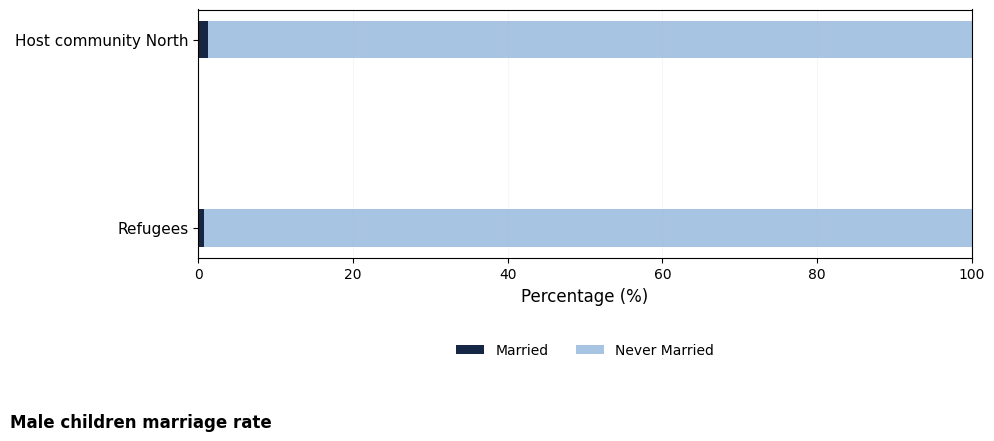

In [30]:
from south_sudan_visuals_function2 import plot_male_children_marriage_rate
plot_male_children_marriage_rate(m_children_marriage_rate)

### Marriage Status Among Female and Male Children (≤17 Years)

Marriage was more commonly reported among girls than boys in both populations. Among female children, 5.7% in the host community and 3.2% among refugees were married. In contrast, only 1.2% of male children in the host community and 0.8% among refugee boys were reported as married. The majority of children in both groups had never been married, with slightly higher rates of never-married status among refugees. Informal or previous unions were rare in both populations, but slightly more observable among refugee girls.

In [31]:
#Looking at education data it is best that we look at early education(pre-school),primary education and also secondary education
going_pre_school = df[df['HH_Educ00'] == 'yes']

In [32]:
#checking the year range for pre_school education so as to perform accurate analysis
print(f"oldest year recorded attending pre-school:  {going_pre_school['ageYears'].max()}")
print(f"youngest year recorded attending pre-school:  {going_pre_school['ageYears'].min()}")

oldest year recorded attending pre-school:  6
youngest year recorded attending pre-school:  0


In [33]:
#While the typical pre-school age range is 3–5 years, our dataset includes reported cases of children aged 0 and 6
#in pre-school. For comparability, the main analysis uses the 3–5 range,
#but we note and summarize results from the full 0–6 range in an appendix.

In [34]:
#filtering on the standard age for pre-school
pre_school_age = df[(df['ageYears'] >= 3) & (df['ageYears'] <= 5)]

In [35]:
pre_school_age['HH_Educ00'].unique()
pre_school_answer = ['yes', 'no']

In [36]:
#according to standard age pre_school attendance rate
standard_pre_school_rate = weighted_category_proportions2(df=pre_school_age,
                                                          weight='wgh_samp_resc_str',
                                                          var = 'HH_Educ00',
                                                          var_values = pre_school_answer)

In [37]:
standard_pre_school_rate

{'Host community North': {'No -----> (%)': '77.9%', 'Yes -----> (%)': '22.1%'},
 'Refugees': {'No -----> (%)': '36.6%', 'Yes -----> (%)': '63.4%'}}

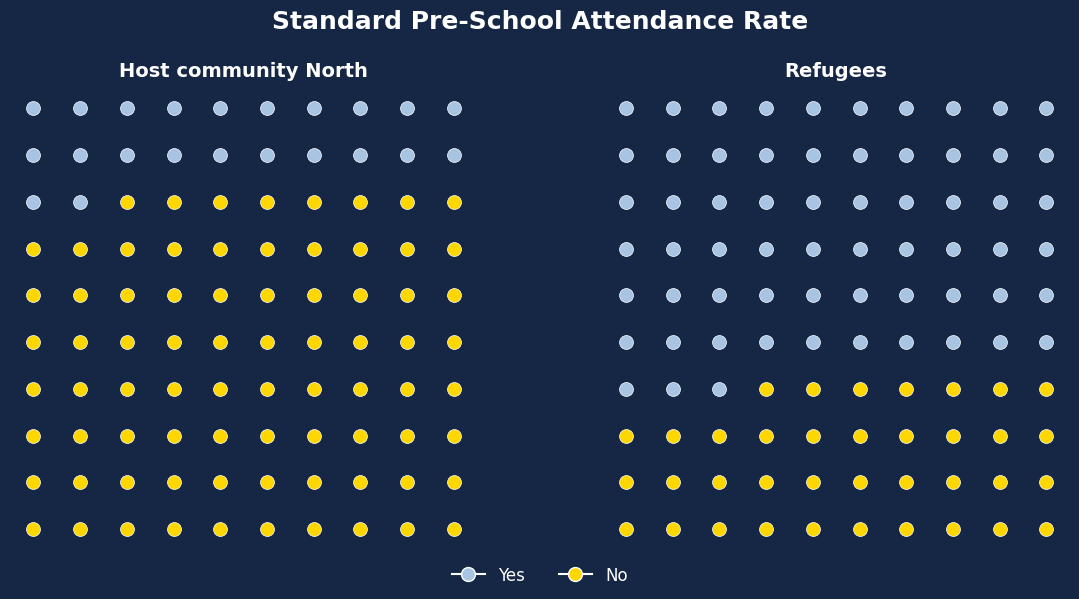

In [38]:
from south_sudan_visuals_function2 import plot_pre_school_attendance_dots
plot_pre_school_attendance_dots(standard_pre_school_rate)

### Standard Pre-School Attendance Among Children Aged 3–5 Years

Pre-school attendance was significantly higher among refugee children compared to those in the host community. Among children aged 3 to 5, 63.4% of refugees attended standard pre-school, compared to just 22.1% of children in the host community. Conversely, 77.9% of host community children did not attend pre-school, compared to 36.6% of refugee children.

In [39]:
# Now lets check the pre_school rate according to how children enroll in this region
fds_pre_school_age = df[(df['ageYears'] >= 0) & (df['ageYears'] <= 6)]

In [40]:
print(fds_pre_school_age['HH_Educ00'].unique())
fds_pre_school_answer = ['yes', 'no',"don't know"]

['yes' 'no' nan "don't know"]


In [41]:
fds_pre_school_rate = weighted_category_proportions2(df = fds_pre_school_age,
                                                      weight = 'wgh_samp_resc_str',
                                                      var = 'HH_Educ00',
                                                      var_values = fds_pre_school_answer)

In [42]:
fds_pre_school_rate

{'Host community North': {"Don'T Know -----> (%)": '0.1%',
  'No -----> (%)': '82.3%',
  'Yes -----> (%)': '17.6%'},
 'Refugees': {'No -----> (%)': '57.9%', 'Yes -----> (%)': '42.1%'}}

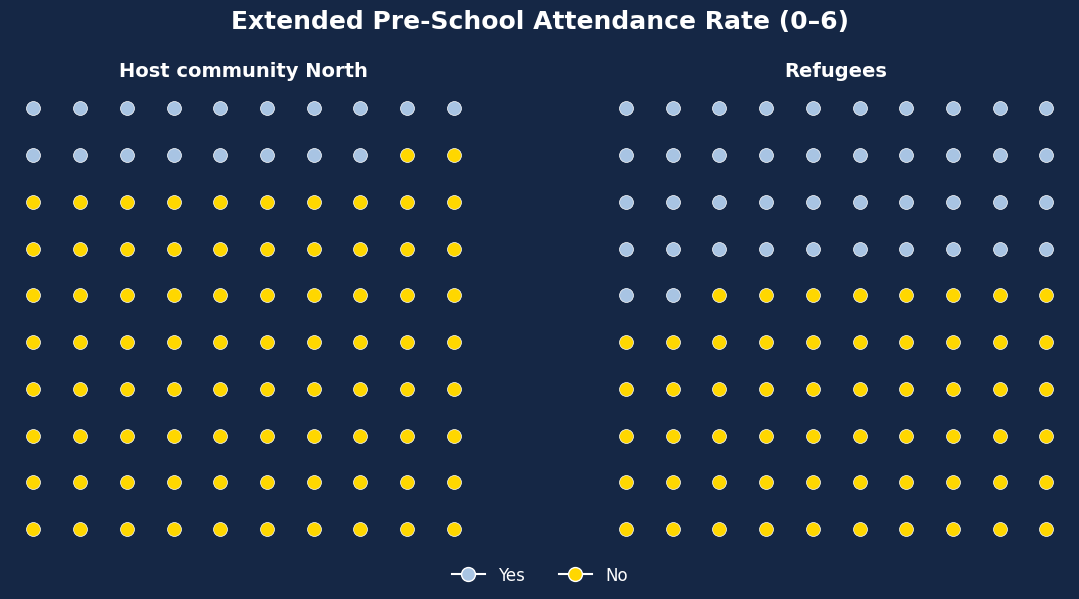

In [43]:
from south_sudan_visuals_function2 import plot_extended_pre_school_attendance_dots
plot_extended_pre_school_attendance_dots(fds_pre_school_rate)

When expanding the age group to 0–6, pre-school participation rates drop slightly, particularly for refugees (from 63.4% to 42.1%), reflecting inclusion of infants and older children less likely to be in pre-school.
Host community attendance rates also decline in the extended range (from 22.1% to 17.6%), suggesting fewer children beyond the core pre-school ages are enrolled. Those responses were probably outliers and we are on the right track using the standard rate.


In [44]:
df['ageYears'].unique()

array([15, 11,  9,  3,  1, 12, 10,  2, 16, 13,  8,  5,  0, 14,  7,  6,  4,
       17])

In [45]:
#we will look at both secondary and primary education combined
print(df['HH_Educ02a'].unique())
school_answer = ['yes','no', "don't know", 'refuse to answer']

['yes' nan 'no' "don't know"]


In [46]:
school_attendance_rate = weighted_category_proportions2(df = df,
                                                        var = 'HH_Educ02a',
                                                        var_values = school_answer,
                                                        weight = "wgh_samp_resc_str")

In [47]:
school_attendance_rate

{'Host community North': {"Don'T Know -----> (%)": '0.0%',
  'No -----> (%)': '52.9%',
  'Yes -----> (%)': '47.0%'},
 'Refugees': {"Don'T Know -----> (%)": '0.1%',
  'No -----> (%)': '20.8%',
  'Yes -----> (%)': '79.1%'}}

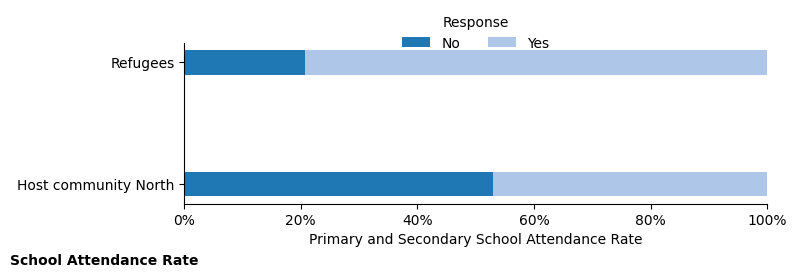

In [48]:
from south_sudan_visuals_function2 import plot_school_attendance_rate
plot_school_attendance_rate(school_attendance_rate)

### School Attendance Among Children Aged 17 and Below

School attendance among children aged 17 and below was notably higher among refugees than in the host community. While 79.1% of refugee children were attending primary or secondary school, only 47.0% of host community children were in school. Non-attendance was more common in the host community, where 52.9% of children were not enrolled, compared to 20.8% among refugee children.

In [49]:
# Answers to the frequency the child attend school
print(df['HH_Educ02b'].unique())
school_attendance_rate_answer = ['most of the year','half of the year','less than half of the year', "don't know"]

['most of the year' nan 'half of the year' 'less than half of the year'
 "don't know"]


In [50]:
# “Only 1 respondent from the Host Community reported attending school less than half of the year. As such,
#confidence intervals for this group are not available I will go ahead and gcombine this data in a merge dict to avoid
#unstable estimates.”
# There are also no don't know response from the refugee sample and only 3 from the refugee. I will group this in a merge dictonary
df[(df['HH_Educ02b'] == "don't know") & (df['Intro_07_1'] == 'Host community North')]

,Intro_07_1,admin0,admin1,ID,rosterposition,HH_03,HH_02,ageYears,HH_00,HH_00a_year,...,HH_Educ18,HH_Educ23,Dis_03,Dis_06,Dis_09,Dis_12,Dis_15,Dis_18,wgh_samp_resc_pop,wgh_samp_resc_str
4222,Host community North,SSD,Upper Nile,593,5,biological child,Female,11,Always lived in host country,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513402,0.513402
12929,Host community North,SSD,Upper Nile,1802,4,biological child,Male,12,Has not always lived in host country,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.540206,1.540206
12930,Host community North,SSD,Upper Nile,1802,5,biological child,Male,10,Has not always lived in host country,2019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.540206,1.540206


In [51]:
#Creating primary,secondary school attendance rate dict
school_attendance_rate_dict = {'most of the year':'most of the year',
                               'half of the year': "less than most of the year or don't know",
                               'less than half of the year':"less than most of the year or don't know",
                               "don't know":"less than most of the year or don't know"}

In [52]:
#Checking the rate difference between the communities
school_attendance_frequency = weighted_category_proportions2(df = df,
                                                          var = 'HH_Educ02b',
                                                          var_values = school_attendance_rate_answer,
                                                          weight = 'wgh_samp_resc_str',
                                                             merge_dict = school_attendance_rate_dict)

In [53]:
school_attendance_frequency

{'Host community North': {"Less Than Most Of The Year Or Don'T Know -----> (%)": '1.1%',
  'Most Of The Year -----> (%)': '98.9%'},
 'Refugees': {"Less Than Most Of The Year Or Don'T Know -----> (%)": '0.8%',
  'Most Of The Year -----> (%)': '99.2%'}}

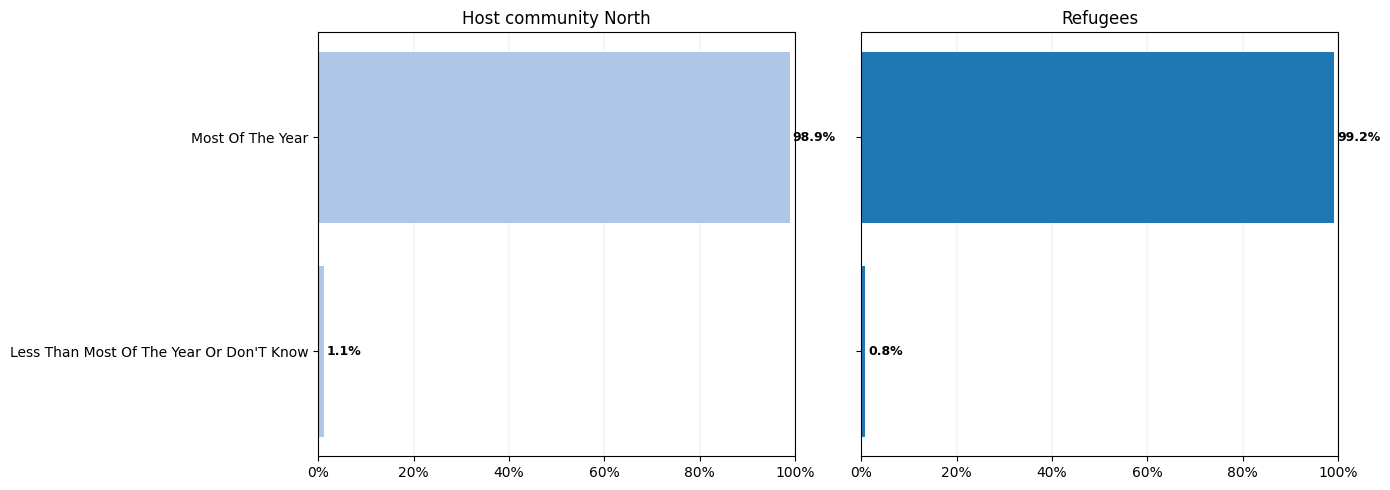

In [54]:
from south_sudan_visuals_function2 import plot_school_attendance_frequency
plot_school_attendance_frequency(school_attendance_frequency)

### School Attendance Frequency Among Children Aged 17 and Below

Among children who were attending school, the majority in both groups attended most of the year. In the host community, 98.9% of school-attending children were present for most of the academic year, while 99.2% of refugee children did the same. Instances of attending less than most of the year or uncertainty about attendance were very low in both populations.

In [55]:
# checking the students unique education grade levels
df['HH_Educ03'].unique()


array([ 4.,  1., nan,  3.,  2.,  7.,  5.,  8., 11.,  6.,  9., 10., 22.,
       28., 29., 13., 12., 21., 23., 15., 24.])

In [56]:
#creating education level dataset clean of null responses
education_levels_df = df[df['HH_Educ03'].notna()].copy()
education_levels_df['HH_Educ03'].unique()

array([ 4.,  1.,  3.,  2.,  7.,  5.,  8., 11.,  6.,  9., 10., 22., 28.,
       29., 13., 12., 21., 23., 15., 24.])

In [57]:
# A function to calculate expected grade from age
def expected_grade(age):
    if age >= 5:
        return age - 4  # e.g., age 6 -> grade 1, age 7 -> grade 2, etc.
    else:
        return 0  # preschool or not yet in school


In [58]:
# according to unicef South Sudan education budget brief 2019
#https://www.mofep-grss.org/wp-content/uploads/2019/09/UNICEF-South-Sudan-2019-Education-Budget-Brief.pdf
#"Primary education generally starts at age 5–6 years..."
# That is the standard I will use
education_levels_df['expected_grade'] = education_levels_df['ageYears'].apply(expected_grade)


In [59]:
education_levels_df['grade_delay'] = education_levels_df['expected_grade'] - education_levels_df['HH_Educ03']


In [60]:
# creating a categorical delay column
def categorize_delay(delay):
    if pd.isna(delay):
        return np.nan
    elif delay == 0:
        return 'No delay'
    elif delay > 0:
        return 'Delayed'
    else:
        return 'Advanced'

education_levels_df['delay_status'] = education_levels_df['grade_delay'].apply(categorize_delay)


In [61]:
# Then get weighted proportions:
var = 'delay_status'
weight = 'wgh_samp_resc_str'
var_values = ['Delayed', 'No delay', 'Advanced']  # All expected categories

In [62]:
education_delay_rate = weighted_category_proportions2(
    df=education_levels_df,
    var=var,
    weight=weight,
    var_values=var_values
)

In [63]:
education_delay_rate

{'Host community North': {'Advanced -----> (%)': '2.6%',
  'Delayed -----> (%)': '95.1%',
  'No Delay -----> (%)': '2.3%'},
 'Refugees': {'Advanced -----> (%)': '2.3%',
  'Delayed -----> (%)': '96.9%',
  'No Delay -----> (%)': '0.8%'}}

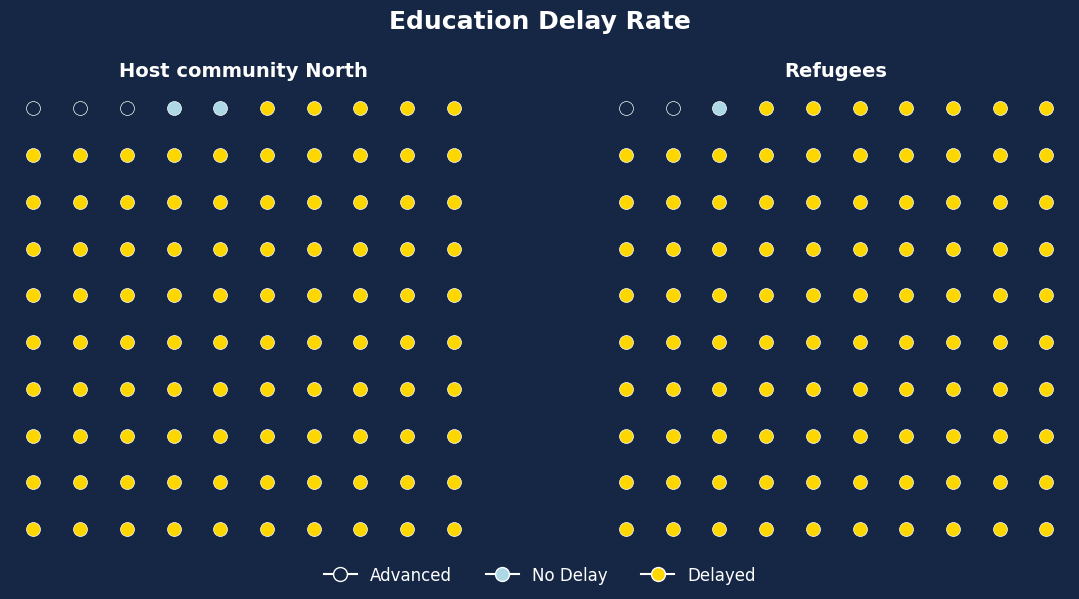

In [64]:
from south_sudan_visuals_function2 import plot_education_delay_rate
plot_education_delay_rate(education_delay_rate)


### Education Progress Status Among Children Aged 5–17 Years

A large majority of children were reported as delayed in their education progress, with 95.1% of host community children and 96.9% of refugee children experiencing delays. Only a small proportion were progressing without delay—2.3% in the host community and 0.8% among refugees. Children who were advanced for their age were similarly few in both groups.

In [65]:
# Checking unique schools attended
df['HH_Educ04a'].unique()

array(['UN or NGO', nan, 'Government or Public',
       'Religious or faith-based organization', 'Private', 'Community',
       "Don't know", 'Other: specify'], dtype=object)

In [66]:
#calculating school type attended rate
school_type_answer = ['UN or NGO','Government or Public','Religious or faith-based organization',
                      'Private', 'Community',"Don't know", 'Other: specify']

In [67]:
school_type_rate = weighted_category_proportions2(df = df,
                                                  var = 'HH_Educ04a',
                                                  var_values = school_type_answer,
                                                  weight = 'wgh_samp_resc_str')

In [68]:
school_type_rate

{'Host community North': {'Community -----> (%)': '0.2%',
  "Don'T Know -----> (%)": '0.2%',
  'Government Or Public -----> (%)': '54.8%',
  'Other: Specify -----> (%)': '0.1%',
  'Private -----> (%)': '8.9%',
  'Religious Or Faith-Based Organization -----> (%)': '3.0%',
  'Un Or Ngo -----> (%)': '32.9%'},
 'Refugees': {'Community -----> (%)': '0.2%',
  "Don'T Know -----> (%)": '0.0%',
  'Government Or Public -----> (%)': '8.6%',
  'Other: Specify -----> (%)': '0.0%',
  'Private -----> (%)': '3.3%',
  'Religious Or Faith-Based Organization -----> (%)': '2.3%',
  'Un Or Ngo -----> (%)': '85.5%'}}

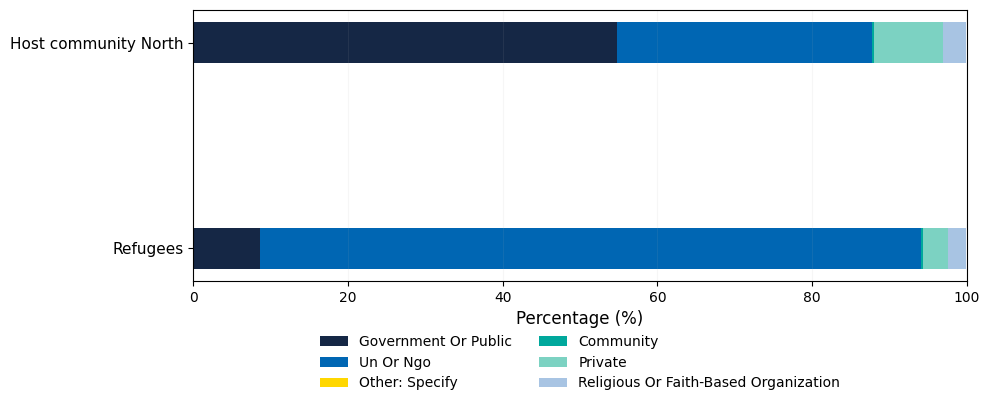

In [69]:
from south_sudan_visuals_function2 import plot_school_type_rate
plot_school_type_rate(school_type_rate)


### Type of School Attendance Among Children

Among host community children, the majority attended government or public schools (54.8%), followed by UN or NGO-supported schools (32.9%). In contrast, most refugee children attended UN or NGO-supported schools (85.5%), with a much smaller share enrolled in government or public schools (8.6%). Attendance at private schools was relatively low for both groups but slightly higher among the host community (8.9%) compared to refugees (3.3%). Attendance at religious, community, or other types of schools remained very limited across both populations.

In [70]:
# replies to if school is accepted by national authorities
df["HH_Educ04b"].unique()

array(['yes', nan, 'no', "don't know"], dtype=object)

In [71]:
#checking the rate of attendance in both accepted and unaccepted
school_n_acceptance_answer = ['yes', 'no', "don't know"]

In [72]:
attendance_n_accepted_rate = weighted_category_proportions2(df = df,
                                                           var = 'HH_Educ04b',
                                                           var_values = school_n_acceptance_answer,
                                                           weight = 'wgh_samp_resc_str')

In [73]:
attendance_n_accepted_rate

{'Host community North': {"Don'T Know -----> (%)": '2.7%',
  'No -----> (%)': '5.1%',
  'Yes -----> (%)': '92.2%'},
 'Refugees': {"Don'T Know -----> (%)": '0.6%',
  'No -----> (%)': '2.3%',
  'Yes -----> (%)': '97.1%'}}

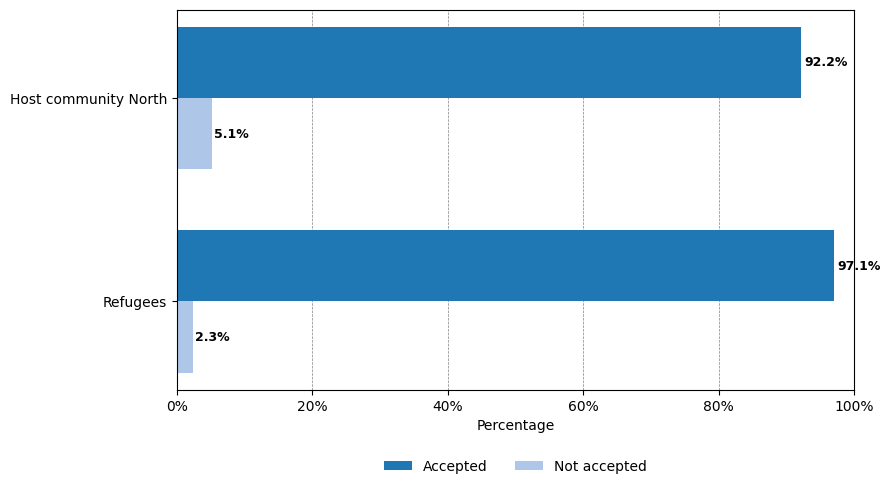

In [74]:
from south_sudan_visuals_function2 import plot_attendance_accepted_rate
plot_attendance_accepted_rate(attendance_n_accepted_rate)

## Recognition of School by National Authority

A high proportion of both host community and refugee children attended schools recognized by the national authority. Among host community children, 92.2% were in recognized schools, while the proportion was even higher among refugee children at 97.1%. Conversely, a small share of children attended unrecognized schools, 5.1% in the host community and 2.3% among refugees.

In [75]:
df['HH_Educ06'].unique()

array([nan, 'do not have interest', 'illness or disability',
       'high costs for education. for instance, the following costs: fees, uniform, books, transport',
       'security concerns for getting to school or at school',
       'too old to continue', 'problem with birth certificate',
       'pregnancy', 'school too far from home',
       'parents think that educating girls is not important',
       'too young to attend school', 'other: specify',
       'death of parent(s)', 'had to work either outside home or at home',
       'do not understand the language of instruction (language barrier)',
       'had to look after children / other household members',
       'teacher absenteeism', "don't know",
       'poor quality of schools / education', 'marriage',
       'experienced bullying / discrimination/ xenophobia from classmates',
       'no admission in school', 'separation of parents',
       'parents consider that school is not important',
       'refuse to answer', 'dismissed /

In [76]:
reasons_not_going_school = ['do not have interest', 'illness or disability',
       'high costs for education. for instance, the following costs: fees, uniform, books, transport',
       'security concerns for getting to school or at school',
       'too old to continue', 'problem with birth certificate',
       'pregnancy', 'school too far from home',
       'parents think that educating girls is not important',
       'too young to attend school', 'other: specify',
       'death of parent(s)', 'had to work either outside home or at home',
       'do not understand the language of instruction (language barrier)',
       'had to look after children / other household members',
       'teacher absenteeism', "don't know",
       'poor quality of schools / education', 'marriage',
       'experienced bullying / discrimination/ xenophobia from classmates',
       'no admission in school', 'separation of parents',
       'parents consider that school is not important',
       'refuse to answer', 'dismissed / expelled',
       'school conflicts with religious beliefs',
       'no recognition of previous formal education']

In [77]:
reasons_not_going_school_rates = weighted_category_proportions2(df = df,
                                                                weight = weight,
                                                                var = 'HH_Educ06',
                                                                var_values = reasons_not_going_school)

In [78]:
reasons_not_going_school_rates

{'Host community North': {'Death Of Parent(S) -----> (%)': '1.2%',
  'Do Not Have Interest -----> (%)': '8.0%',
  'Do Not Understand The Language Of Instruction (Language Barrier) -----> (%)': '0.1%',
  "Don'T Know -----> (%)": '0.6%',
  'Had To Look After Children / Other Household Members -----> (%)': '3.2%',
  'Had To Work Either Outside Home Or At Home -----> (%)': '0.7%',
  'High Costs For Education. For Instance, The Following Costs: Fees, Uniform, Books, Transport -----> (%)': '35.0%',
  'Illness Or Disability -----> (%)': '1.2%',
  'Marriage -----> (%)': '0.4%',
  'No Admission In School -----> (%)': '0.4%',
  'Other: Specify -----> (%)': '5.6%',
  'Parents Consider That School Is Not Important -----> (%)': '0.1%',
  'Parents Think That Educating Girls Is Not Important -----> (%)': '0.1%',
  'Poor Quality Of Schools / Education -----> (%)': '0.3%',
  'Pregnancy -----> (%)': '0.1%',
  'Problem With Birth Certificate -----> (%)': '0.0%',
  'Refuse To Answer -----> (%)': '0.2%',
 

In [79]:
#Top 10 reasons data
data = {
    'Host community North': {
        'High Costs For Education': '35.0%',
        'School Too Far From Home': '28.7%',
        'Do Not Have Interest': '8.0%',
        'Too Young To Attend School': '8.0%',
        'Other: Specify': '5.6%',
        'Had To Look After Children': '3.2%',
        'Security Concerns': '2.8%',
        'Teacher Absenteeism': '2.4%',
        'Illness Or Disability': '1.2%',
        'Death Of Parent(S)': '1.2%',
    },
    'Refugees': {
        'High Costs For Education': '31.9%',
        'Do Not Have Interest': '21.1%',
        'Too Young To Attend School': '16.8%',
        'Other: Specify': '10.9%',
        'Had To Work': '2.5%',
        'Had To Look After Children': '2.3%',
        'Illness Or Disability': '2.3%',
        'Pregnancy': '2.4%',
        'School Too Far From Home': '2.4%',
    }
}

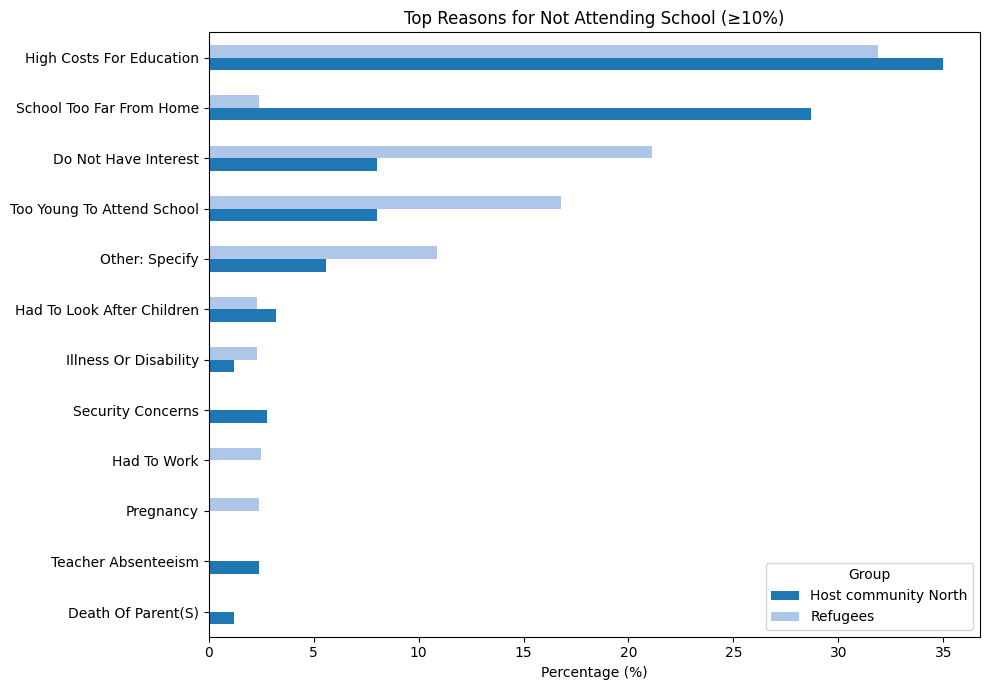

In [80]:
from south_sudan_visuals_function2 import plot_top_reasons_for_not_attending_school
plot_top_reasons_for_not_attending_school(data)

## **Barriers to School Attendance Among Host and Refugee Children**

**Financial burden** is the leading barrier to school attendance for both host communities and refugees, with more than 30% in each group citing the high costs of education—such as fees, uniforms, books, and transport—as a key reason.

However, the nature of challenges diverges significantly between the two groups:

- **Host communities** report much greater issues related to **infrastructure**, particularly the **distance to school** and **teacher absenteeism**. These challenges reflect more on service availability and accessibility than individual or household-level factors.
  
- In contrast, **refugees face a broader range of social and personal challenges**, including **low interest in education**, being **too young**, **illness or disability**, **work responsibilities**, and even **pregnancy**. These reasons point toward more complex systemic and psychosocial stressors affecting refugee children and their households.

- The **host group’s reasons are more concentrated** around a few key issues—mainly financial and infrastructural—while **refugee reasons are more diversified**, suggesting that interventions for refugee communities need to be multifaceted and sensitive to social and emotional wellbeing.

### Additional Low-Prevalence Reasons (Not Shown in Visuals)

Though not visualized due to their lower frequency, both groups reported other barriers:

- **Host community children** sometimes missed school due to **marriage**, **no admission**, **language barriers**, **parental separation**, **parents undervaluing education**, **administrative issues** (e.g., lack of birth certificates), and perceptions of being **too old**.

- **Refugee children** faced unique additional barriers like **bullying or xenophobia**, being **dismissed or expelled**, **conflicts between school and religious beliefs**, **non-recognition of prior formal education**, and similar cultural or administrative obstacles.

These lesser-reported reasons, while statistically minor, highlight underlying cultural, bureaucratic, and psychological dimensions that merit attention in policy and programming.

In [81]:
# The column on if a child has ever gone to school has ambiguous codes which makes it difficult
# to understand what they represent. I have tried checking with the column having response on
#'if you are currently going to school Educ02a but its still incosistent.
df[df['HH_Educ07'].isna()]['HH_Educ02a'].unique()

array(['yes', nan, "don't know"], dtype=object)

In [82]:
# checking responses of at what age child started going to school
df['HH_Educ10'].unique()

array(['05', '04', nan, '06', '08', '07', '11', '09', '10', '13', '12',
       '60 or more', '15', '14', 5.0, 6.0, 4.0, 7.0, 8.0, 10.0, 9.0, 11.0,
       12.0, 13.0, 15.0, 14.0, 17.0, 16.0], dtype=object)

In [83]:
# Found an incosistent reponse of child of 15 years saying they started going to school at the age of 60 years or more
df[(df['HH_Educ10'] ==  '60 or more' )]

,Intro_07_1,admin0,admin1,ID,rosterposition,HH_03,HH_02,ageYears,HH_00,HH_00a_year,...,HH_Educ18,HH_Educ23,Dis_03,Dis_06,Dis_09,Dis_12,Dis_15,Dis_18,wgh_samp_resc_pop,wgh_samp_resc_str
819,Refugees,SSD,Western Equatoria,110,9,niece/nephew,Female,15,Always lived in host country,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250428,1.026042


In [84]:
def checking_age_consistency(df,age_column,school_year_column):
    """
    df - Dataframe containing the two columns
    age_column - represents the age of the child
    school_year_column - represents the reponse of the child to the question
    when they started going to school"""
    df = df.copy()
    df[school_year_column] = df['HH_Educ10'].replace({'60 or more': '60'})
    df = df.dropna(subset = [school_year_column,age_column])
    df[school_year_column] = df[school_year_column].astype(int)
    incosistent_data = pd.DataFrame()
    df['range'] = df[age_column] - df[school_year_column]
    for i in df['range']:
      if i < 0:
        incosistent_data = pd.concat([incosistent_data,df[df['range'] == i][[age_column,school_year_column]]])
    return incosistent_data

In [85]:
inconsistent_data = checking_age_consistency(df = df,age_column = 'ageYears',school_year_column = 'HH_Educ10')

In [86]:
# This column has incosistent information which will not help us in our analysis
# we have 997 inconsistent rows to this question(Educ10)
inconsistent_data

,ageYears,HH_Educ10
244,7,8
477,3,4
926,4,5
1675,5,6
2731,10,11
...,...,...
16382,8,10
16648,8,10
18035,7,9
20428,11,13


In [87]:
# those who have ever experienced interruptions while in school
df['HH_Educ15a'].unique()

array(['no', nan, 'yes', "don't know"], dtype=object)

In [88]:
interruptions_at_school_answer = ['no','yes', "don't know"]

In [89]:
interruptions_rate = weighted_category_proportions2(df = df,
                                                  var = 'HH_Educ15a',
                                                  var_values = interruptions_at_school_answer,
                                                  weight = 'wgh_samp_resc_str')

In [90]:
interruptions_rate

{'Host community North': {"Don'T Know -----> (%)": '0.2%',
  'No -----> (%)': '81.1%',
  'Yes -----> (%)': '18.7%'},
 'Refugees': {"Don'T Know -----> (%)": '0.1%',
  'No -----> (%)': '86.5%',
  'Yes -----> (%)': '13.4%'}}

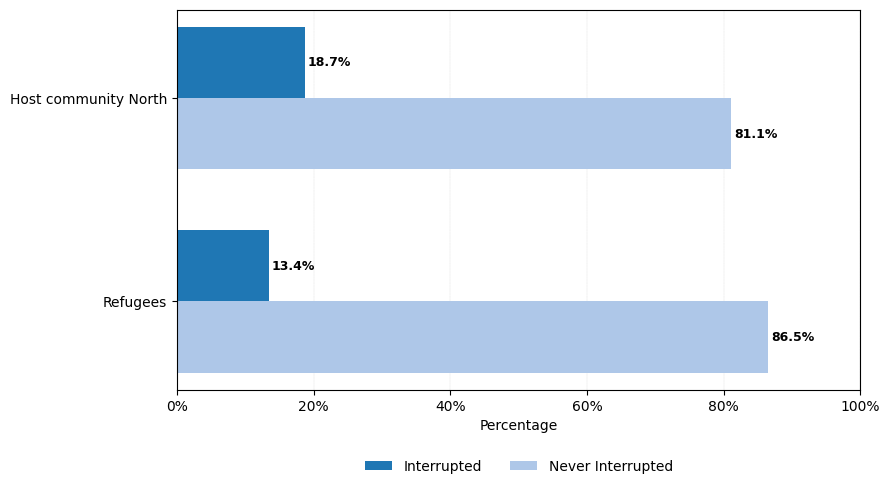

In [91]:
from south_sudan_visuals_function2 import plot_interruptions_rate
plot_interruptions_rate(interruptions_rate)

### School Interruption Experiences
About 1 in 5 children (18.7%) in the host community reported having their schooling interrupted. A large majority in both groups reported no interruption—81.1% of host children and 86.5% of refugees. Host children are more likely than refugee children to experience schooling interruptions.

In [92]:
df['HH_Educ16'].unique()

array([nan, 'Illness or disability',
       'Security concerns (getting to school, or at school)', 'Pregnancy',
       'High costs', 'Dismissed/Expelled', 'Stopped having interest',
       'Other', 'Teacher absenteeism',
       'Had to work either outside home or at home',
       'Separation of parents', 'Marriage', 'Death of parent(s)',
       'Had to look after children/other household members',
       'Refuse to answer', 'Poor quality of schools/education',
       'School too far from home',
       'Did not understand the language of instruction',
       'No recognition of previous formal education', 'Don’t know',
       'Parents think that educating girls is not important',
       'No admission in school',
       'Parents consider that school is not important',
       'Problem with birth certificate',
       'Experienced bullying/discrimination/xenophobia from classmates'],
      dtype=object)

In [93]:
reasons_for_last_school_interruption = ['Illness or disability',
       'Security concerns (getting to school, or at school)', 'Pregnancy',
       'High costs', 'Dismissed/Expelled', 'Stopped having interest',
       'Other', 'Teacher absenteeism',
       'Had to work either outside home or at home',
       'Separation of parents', 'Marriage', 'Death of parent(s)',
       'Had to look after children/other household members',
       'Refuse to answer', 'Poor quality of schools/education',
       'School too far from home',
       'Did not understand the language of instruction',
       'No recognition of previous formal education', 'Don’t know',
       'Parents think that educating girls is not important',
       'No admission in school',
       'Parents consider that school is not important',
       'Problem with birth certificate',
       'Experienced bullying/discrimination/xenophobia from classmates']

In [94]:
rate_for_each_interruption = weighted_category_proportions2(df=df,
                                                            var='HH_Educ16',
                                                            var_values = reasons_for_last_school_interruption,
                                                            weight = weight)

In [95]:
rate_for_each_interruption

{'Host community North': {'Death Of Parent(S) -----> (%)': '1.6%',
  'Dismissed/Expelled -----> (%)': '0.7%',
  'Don’T Know -----> (%)': '1.3%',
  'Had To Look After Children/Other Household Members -----> (%)': '1.8%',
  'Had To Work Either Outside Home Or At Home -----> (%)': '0.4%',
  'High Costs -----> (%)': '46.9%',
  'Illness Or Disability -----> (%)': '9.7%',
  'Marriage -----> (%)': '1.6%',
  'No Admission In School -----> (%)': '0.2%',
  'Other -----> (%)': '7.7%',
  'Parents Think That Educating Girls Is Not Important -----> (%)': '0.6%',
  'Poor Quality Of Schools/Education -----> (%)': '1.0%',
  'Pregnancy -----> (%)': '0.4%',
  'School Too Far From Home -----> (%)': '6.2%',
  'Security Concerns (Getting To School, Or At School) -----> (%)': '6.0%',
  'Separation Of Parents -----> (%)': '0.3%',
  'Stopped Having Interest -----> (%)': '5.0%',
  'Teacher Absenteeism -----> (%)': '8.8%'},
 'Refugees': {'Death Of Parent(S) -----> (%)': '0.7%',
  'Did Not Understand The Language

In [96]:
# Data from your dictionary (simplified and cleaned)
host_reasons = {
    'High Costs': 46.9,
    'Illness or Disability': 9.7,
    'Teacher Absenteeism': 8.8,
    'Other': 7.7,
    'School Too Far From Home': 6.2
}

refugee_reasons = {
    'High Costs': 39.8,
    'Stopped Having Interest': 11.7,
    'Other': 20.0,
    'Illness or Disability': 8.3,
    'Security Concerns': 5.7
}

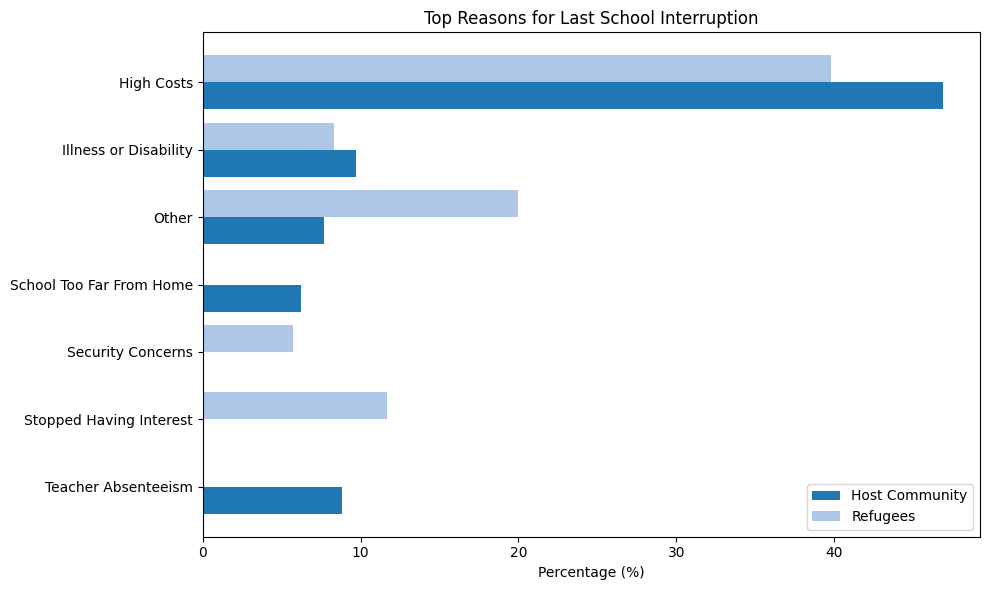

In [97]:
from south_sudan_visuals_function2 import plot_school_interruption_reasons
plot_school_interruption_reasons(host_reasons,refugee_reasons)

## **Top Reasons for Last School Interruption**

The top reasons for the most recent school interruption differ notably between host communities and refugee populations, highlighting both shared and distinct barriers to sustained education.

- **High costs** dominate in both groups, cited by nearly **1 in 2 host children (47%)** and **2 in 5 refugee children (40%)**. This underscores the heavy financial burden of education across contexts.
  
- Among **host community children**, the next leading reasons were:
  - **Illness or disability** (10%)
  - **Teacher absenteeism** (9%)
  - **Other unspecified reasons** (8%)
  - **School being too far** (6%)

- In contrast, **refugee children** reported:
  - A significantly higher share citing **"Other" reasons** (20%), indicating diverse and possibly unclassified disruptions.
  - **Loss of interest in school** (12%)—a notable psychosocial factor.
  - **Illness or disability** (8%) and **security concerns** (6%) also featured prominently.

### Key Observations:

- While **financial hardship** is a common top issue, **host children experience more structural issues**—such as teacher absenteeism and distance to school—suggesting systemic gaps in service provision.
  
- **Refugee children report more personal or psychosocial barriers**, including lack of motivation and general uncertainty ("other"), reflecting the complex challenges of displacement and instability.

- The **"Other" category for refugees** is particularly high (1 in 5), which may reflect unspoken or hard-to-classify hardships, such as trauma, documentation problems, or unrecognized educational histories.

### Additional Factors (Low Prevalence):

Although not dominant, other reasons for school interruption included:
- **Pregnancy, marriage, and childcare duties**
- **Work responsibilities inside or outside the home**
- **Discrimination, language barriers, lack of admission, and parent attitudes**
- **Security threats or school quality concerns**

These less frequently cited barriers still matter—especially for vulnerable subgroups—and should not be overlooked in programming or policy design. Together, they highlight the **multifaceted nature of educational disruptions**.

In [98]:
# checking uniques answers to reading or writing simple text
df['HH_Educ23'].unique()

array([nan, 'no', 'yes'], dtype=object)

In [99]:
write_or_read_answers = ['no', 'yes']

In [100]:
#Checking literacy rate among children
literacy_rate = weighted_category_proportions2(df = df,
                                              var = 'HH_Educ23',
                                              var_values = write_or_read_answers,
                                              weight = 'wgh_samp_resc_str')

In [101]:
literacy_rate

{'Host community North': {'No -----> (%)': '99.9%', 'Yes -----> (%)': '0.1%'},
 'Refugees': {'No -----> (%)': '99.7%', 'Yes -----> (%)': '0.3%'}}

In [102]:
# Illiteracy data
illiteracy_data = {
    'Host community North': 99.9,
    'Refugees': 99.7
}

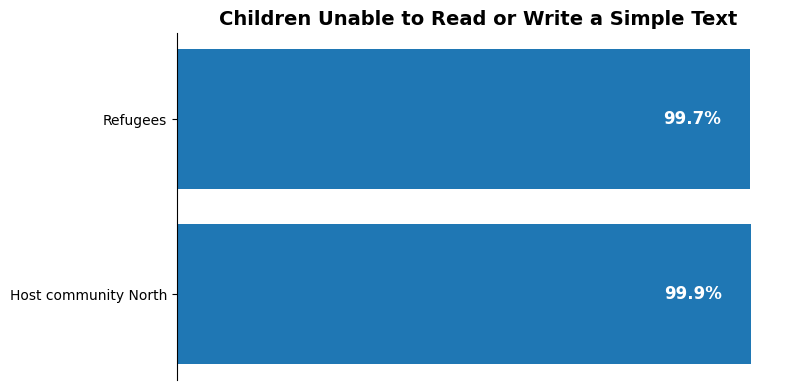

In [103]:
from south_sudan_visuals_function2 import plot_illiteracy_data
plot_illiteracy_data(illiteracy_data)

### Literacy Rate Analysis
Both groups show extremely high illiteracy rates, with over 99% of children unable to read or write a simple text.

In the host community, only 0.1% of children are literate, meaning 99.9% are not.

Among refugees, 0.3% are literate, with 99.7% unable to read or write.

These figures reflect a widespread lack of basic literacy skills across both populations.

In [104]:
# difficulty seeing
#"Respondents with no recorded disability were assumed not to have one,
# based on the survey’s skip patterns and the structure of the data.
df['Dis_03'] = df['Dis_03'].fillna('no difficulty')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12479 entries, 3 to 22091
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Intro_07_1         12479 non-null  object 
 1   admin0             12479 non-null  object 
 2   admin1             11962 non-null  object 
 3   ID                 12479 non-null  int64  
 4   rosterposition     12479 non-null  int64  
 5   HH_03              12463 non-null  object 
 6   HH_02              12474 non-null  object 
 7   ageYears           12479 non-null  int64  
 8   HH_00              12478 non-null  object 
 9   HH_00a_year        521 non-null    object 
 10  HH_00a_month       525 non-null    float64
 11  HH_00b_year        1 non-null      object 
 12  HH_00b_month       0 non-null      float64
 13  HH_11a             8046 non-null   float64
 14  HH_11b             32 non-null     object 
 15  HH_13              12401 non-null  object 
 16  ID_00              1775 non

In [105]:
df['Dis_03'].unique()

array(['no difficulty', 'a lot of difficulty', 'some difficulty',
       "don't know", 'cannot do at all'], dtype=object)

In [106]:
#calculate rate at which children have difficulty seeing
difficulty_seeing = ['no difficulty', 'a lot of difficulty', 'some difficulty',"don't know", 'cannot do at all']
difficulty_seeing_rate = weighted_category_proportions2(df = df,
                                                        var = 'Dis_03',
                                                        var_values = difficulty_seeing,
                                                        weight = 'wgh_samp_resc_str')

In [107]:
df['Dis_03'].unique()

array(['no difficulty', 'a lot of difficulty', 'some difficulty',
       "don't know", 'cannot do at all'], dtype=object)

In [108]:
difficulty_seeing_rate

{'Host community North': {'A Lot Of Difficulty -----> (%)': '0.4%',
  'Cannot Do At All -----> (%)': '0.0%',
  'No Difficulty -----> (%)': '99.3%',
  'Some Difficulty -----> (%)': '0.3%'},
 'Refugees': {'A Lot Of Difficulty -----> (%)': '0.6%',
  'Cannot Do At All -----> (%)': '0.0%',
  "Don'T Know -----> (%)": '0.0%',
  'No Difficulty -----> (%)': '98.8%',
  'Some Difficulty -----> (%)': '0.6%'}}

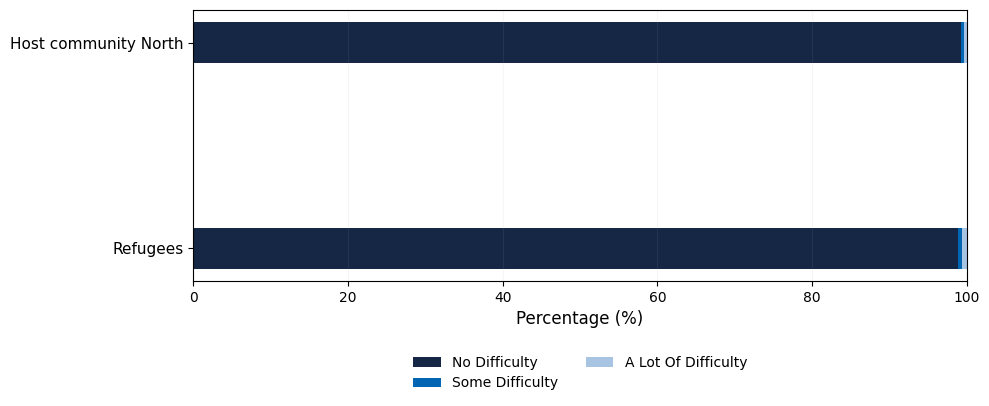

In [109]:
from south_sudan_visuals_function2 import plot_difficulty_seeing
plot_difficulty_seeing(difficulty_seeing_rate)

## **Visual Disability Analysis – Sight**

Most children in both groups report no visual impairments.

- In the **host community**, **99.3%** have no difficulty seeing, while a very small proportion report **some (0.3%)** or **a lot of difficulty (0.4%)**.
- Among **refugees**, **98.8%** report no difficulty, with **0.6%** experiencing **some** and another **0.6% a lot** of difficulty seeing.

Overall, visual disability is **rare** in both groups, affecting **less than 1%** of children.

In [110]:
#difficulty hearing analysis
df['Dis_06'] = df['Dis_06'].fillna('no difficulty')
df['Dis_06'].unique()

array(['no difficulty', 'a lot of difficulty', 'some difficulty',
       'cannot do at all'], dtype=object)

In [111]:
difficulty_hearing = ['no difficulty', 'a lot of difficulty', 'some difficulty','cannot do at all']
difficulty_hearing_rate = weighted_category_proportions2(df = df,
                                                         var = 'Dis_06',
                                                         var_values = difficulty_hearing,
                                                         weight = 'wgh_samp_resc_str')

In [112]:
difficulty_hearing_rate

{'Host community North': {'A Lot Of Difficulty -----> (%)': '0.2%',
  'Cannot Do At All -----> (%)': '0.0%',
  'No Difficulty -----> (%)': '99.3%',
  'Some Difficulty -----> (%)': '0.5%'},
 'Refugees': {'A Lot Of Difficulty -----> (%)': '0.6%',
  'Cannot Do At All -----> (%)': '0.1%',
  'No Difficulty -----> (%)': '98.6%',
  'Some Difficulty -----> (%)': '0.7%'}}

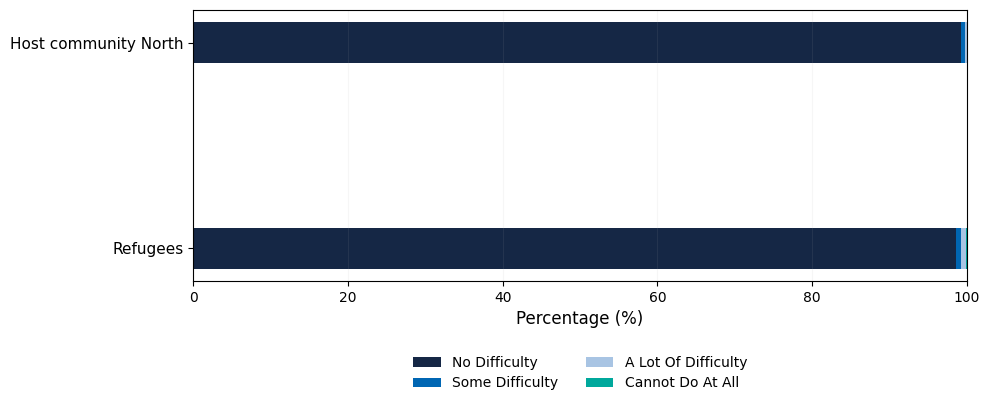

In [113]:
from south_sudan_visuals_function2 import plot_difficulty_hearing
plot_difficulty_hearing(difficulty_hearing_rate)

## **Hearing Difficulty Analysis**

Both groups report very high levels of no hearing difficulty, with only small portions facing challenges:

- In the **host community**, **99.3%** of children report **no difficulty**, while **0.5%** experience **some difficulty**, and **0.2%** report **a lot of difficulty**.
- Among **refugees**, **98.6%** report **no difficulty**, with **0.7%** having **some difficulty**, and **0.6%** experiencing **a lot of difficulty**. A **small portion (0.1%)** is completely unable to hear.

Overall, **hearing difficulties** are **minimal** across both groups, with over **98%** of children experiencing no issues.

In [114]:
#difficulty walking
df['Dis_09'] = df['Dis_09'].fillna('no difficulty')
df['Dis_09'].unique()

array(['no difficulty', 'some difficulty', 'cannot do at all',
       'a lot of difficulty'], dtype=object)

In [115]:
difficulty_walking = ['no difficulty', 'some difficulty', 'cannot do at all',
       'a lot of difficulty']
difficulty_walking_rate = weighted_category_proportions2(df = df,
                                                      var = 'Dis_09',
                                                      var_values = difficulty_walking,
                                                      weight = 'wgh_samp_resc_str')

In [116]:
difficulty_walking_rate

{'Host community North': {'A Lot Of Difficulty -----> (%)': '0.2%',
  'Cannot Do At All -----> (%)': '0.0%',
  'No Difficulty -----> (%)': '99.6%',
  'Some Difficulty -----> (%)': '0.2%'},
 'Refugees': {'A Lot Of Difficulty -----> (%)': '0.5%',
  'Cannot Do At All -----> (%)': '0.1%',
  'No Difficulty -----> (%)': '99.2%',
  'Some Difficulty -----> (%)': '0.2%'}}

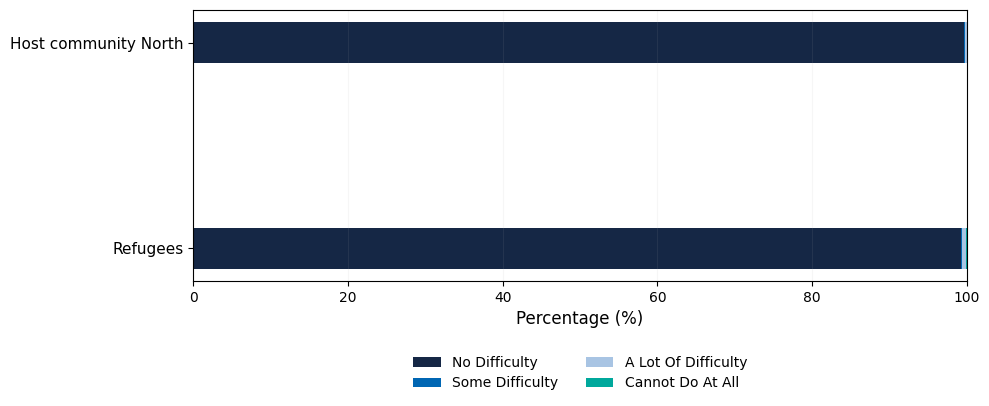

In [117]:
from south_sudan_visuals_function2 import plot_difficulty_walking
plot_difficulty_walking(difficulty_walking_rate)

## **Walking Difficulty Analysis**

- In the **host community**, **99.6%** of children report **no difficulty walking**, with **0.2%** experiencing **some difficulty**, and another **0.2%** facing **a lot of difficulty**.
- Among **refugees**, **99.2%** report **no difficulty walking**, while **0.2%** have **some difficulty**, and **0.5%** experience **a lot of difficulty**. A very small portion (**0.1%**) is completely unable to walk.

Overall, **walking difficulties** are **very low** in both groups, with over **99%** of children having no issues.

In [118]:
#difficulty concentrating
df['Dis_12'] = df['Dis_12'].fillna('no difficulty')
df['Dis_12'].unique()

array(['no difficulty', 'a lot of difficulty', 'some difficulty',
       'cannot do at all'], dtype=object)

In [119]:
difficulty_concentrating = ['no difficulty', 'a lot of difficulty', 'some difficulty',
       'cannot do at all']

difficulty_concentrating_rate = weighted_category_proportions2(df = df,
                                                            var = 'Dis_12',
                                                            var_values = difficulty_concentrating,
                                                            weight = 'wgh_samp_resc_str')

In [120]:
difficulty_concentrating_rate

{'Host community North': {'A Lot Of Difficulty -----> (%)': '0.1%',
  'No Difficulty -----> (%)': '99.8%',
  'Some Difficulty -----> (%)': '0.2%'},
 'Refugees': {'A Lot Of Difficulty -----> (%)': '0.3%',
  'Cannot Do At All -----> (%)': '0.0%',
  'No Difficulty -----> (%)': '99.4%',
  'Some Difficulty -----> (%)': '0.3%'}}

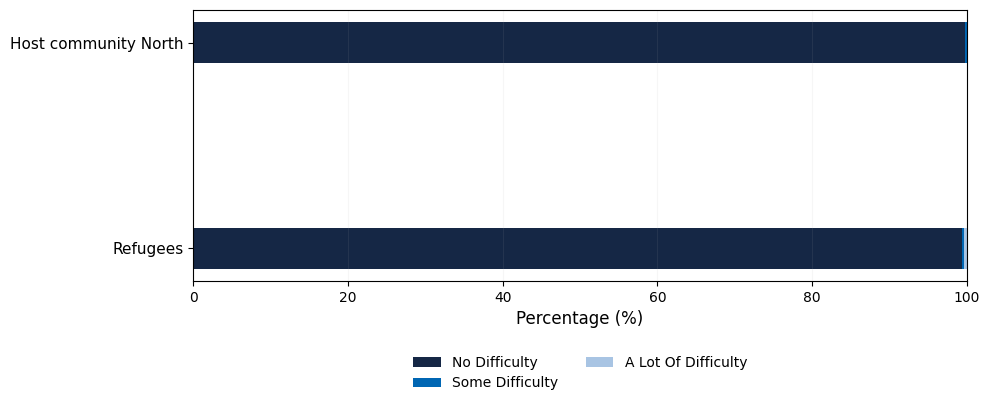

In [121]:
from south_sudan_visuals_function2 import plot_difficulty_concentrating
plot_difficulty_concentrating(difficulty_concentrating_rate)

## **Concentration Difficulty Analysis**

- In the **host community**, **99.8%** of children report **no difficulty concentrating**, with **0.2%** experiencing **some difficulty**, and **0.1%** facing **a lot of difficulty**.
- Among **refugees**, **99.4%** report **no difficulty concentrating**, while **0.3%** have **some difficulty**, and **0.3%** experience **a lot of difficulty**.

Overall, **concentration difficulties** are **extremely low** in both groups, with nearly all children reporting no issues.

In [122]:
#difficulty self care
df['Dis_15'] = df['Dis_15'].fillna('no difficulty')
df['Dis_15'].unique()

array(['no difficulty', 'some difficulty', 'a lot of difficulty',
       'cannot do at all'], dtype=object)

In [123]:
difficulty_selfcare = ['no difficulty', 'some difficulty', 'a lot of difficulty',
       'cannot do at all']
difficulty_selfcare_rate = weighted_category_proportions2(df = df,
                                                          var = 'Dis_15',
                                                          var_values = difficulty_selfcare,
                                                          weight = 'wgh_samp_resc_str')

In [124]:
difficulty_selfcare_rate

{'Host community North': {'A Lot Of Difficulty -----> (%)': '0.1%',
  'No Difficulty -----> (%)': '99.8%',
  'Some Difficulty -----> (%)': '0.1%'},
 'Refugees': {'A Lot Of Difficulty -----> (%)': '0.3%',
  'Cannot Do At All -----> (%)': '0.1%',
  'No Difficulty -----> (%)': '99.6%',
  'Some Difficulty -----> (%)': '0.1%'}}

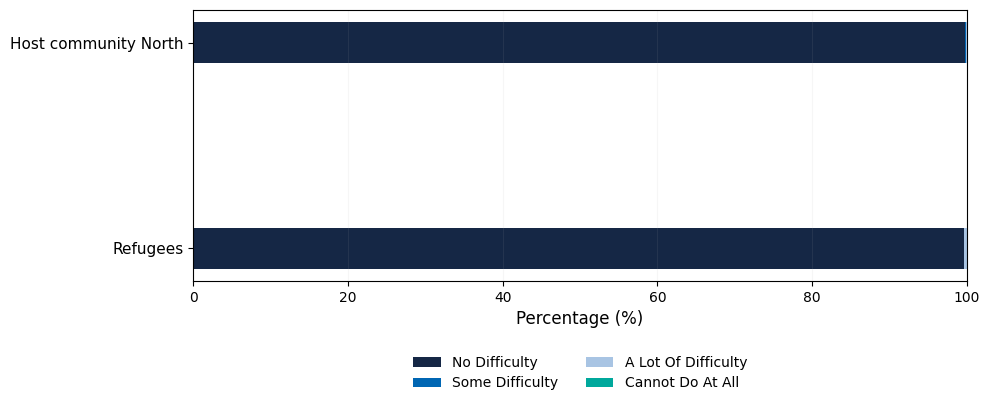

In [125]:
from south_sudan_visuals_function2 import plot_difficulty_selfcare
plot_difficulty_selfcare(difficulty_selfcare_rate)

## **Self-Care Difficulty Analysis**

- In the **host community**, **99.8%** of children report **no difficulty** with self-care, while **0.1%** experience **some difficulty**, and **0.1%** face **a lot of difficulty**.
- Among **refugees**, **99.6%** report **no difficulty** with self-care, while **0.1%** have **some difficulty**, and **0.3%** experience **a lot of difficulty**. **0.1%** of refugees also report being unable to do self-care at all.

Overall, the majority of children in both groups report no issues with self-care, with **very low prevalence** of difficulty in either group.

In [126]:
#difficulty communicating
df['Dis_18'] = df['Dis_18'].fillna('no difficulty')
df['Dis_18'].unique()

array(['no difficulty', 'a lot of difficulty', 'cannot do at all',
       'some difficulty'], dtype=object)

In [127]:
difficulty_communicating = ['no difficulty', 'a lot of difficulty', 'cannot do at all',
       'some difficulty']

difficulty_communicating_rate = weighted_category_proportions2(df = df,
                                                            var = 'Dis_18',
                                                            var_values = difficulty_communicating,
                                                            weight = 'wgh_samp_resc_str')

In [128]:
difficulty_communicating_rate

{'Host community North': {'A Lot Of Difficulty -----> (%)': '0.1%',
  'No Difficulty -----> (%)': '99.9%',
  'Some Difficulty -----> (%)': '0.0%'},
 'Refugees': {'A Lot Of Difficulty -----> (%)': '0.2%',
  'Cannot Do At All -----> (%)': '0.2%',
  'No Difficulty -----> (%)': '99.3%',
  'Some Difficulty -----> (%)': '0.3%'}}

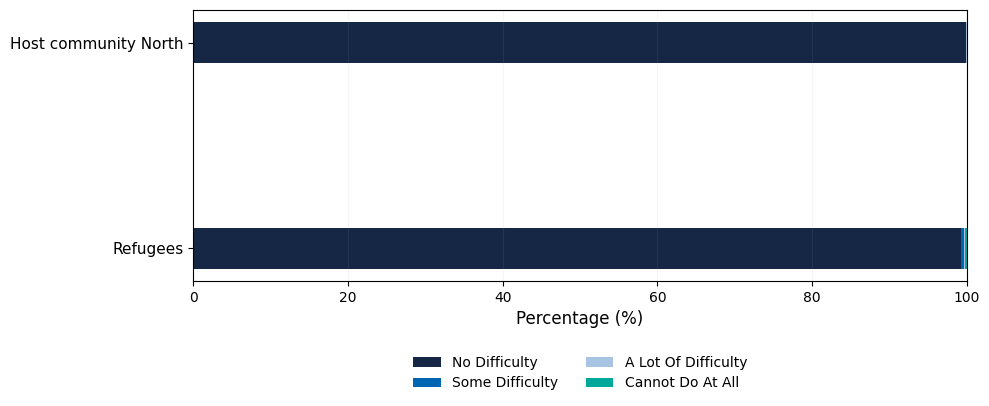

In [129]:
from south_sudan_visuals_function2 import plot_difficulty_communicating
plot_difficulty_communicating(difficulty_communicating_rate)

## **Communication Difficulty Analysis**

- In the **host community**, **99.9%** of children report **no difficulty** with communication, while **0.1%** experience **a lot of difficulty**, and none report being unable to communicate at all.
- Among **refugees**, **99.3%** report **no difficulty** with communication, while **0.3%** have **some difficulty**, **0.2%** experience **a lot of difficulty**, and **0.2%** report being unable to communicate at all.

Overall, both groups report **minimal communication difficulties**, with the host community showing nearly universal ability to communicate, while a small proportion of refugees face some level of communication challenges.